In [238]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [239]:
with open("all_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment
0,Studio,2017,01,1457.0,2017,01,654100.0,49,31,28
1,Studio,2017,02,1482.5,2017,02,667000.0,43,30,26
2,Studio,2017,03,1275.0,2017,03,674400.0,43,27,23
3,Studio,2017,04,1385.0,2017,04,671400.0,35,27,24
4,Studio,2017,05,1595.0,2017,05,676000.0,33,25,21


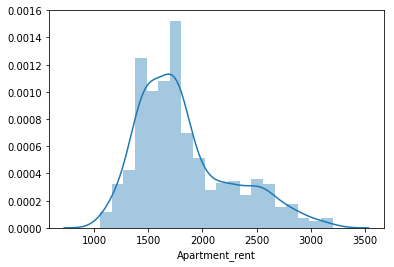

In [240]:
sns.distplot(merge_housing.Apartment_rent)

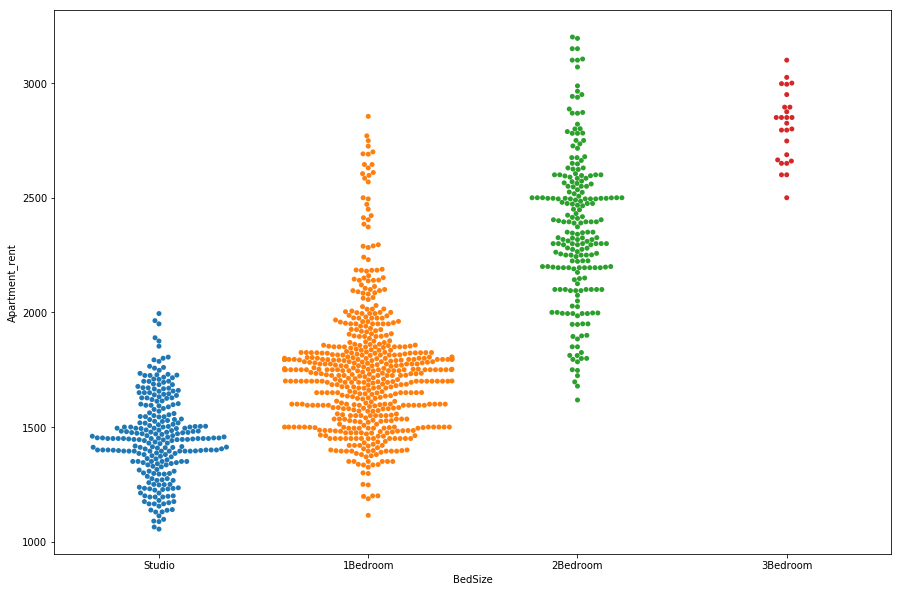

In [241]:
plt.subplots(figsize=(15,10))
sns.swarmplot(x=merge_housing['BedSize'], y=merge_housing['Apartment_rent'], data=merge_housing)

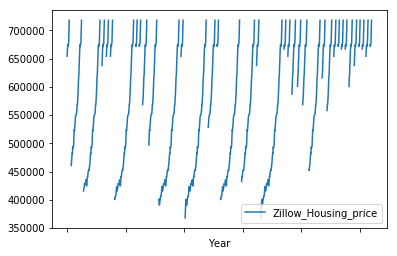

In [242]:
merge_housing.plot.line(x='Year', y='Zillow_Housing_price')

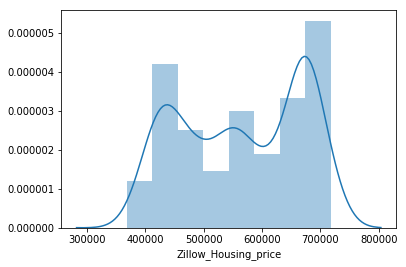

In [243]:
sns.distplot(merge_housing.Zillow_Housing_price.dropna())

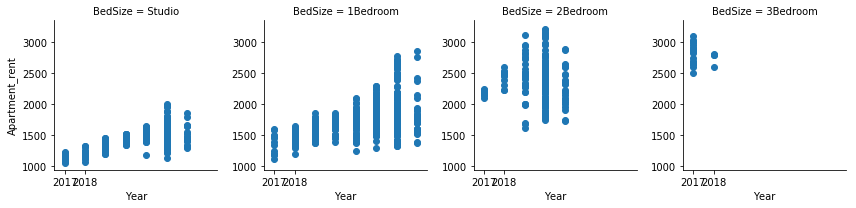

In [244]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(merge_housing, col='BedSize')
g.map(plt.scatter, 'Year', "Apartment_rent")



In [245]:
merge_housing['Year'].value_counts()

2017    440
2016    174
2015    120
2014     95
2018     76
2013     73
2012     57
2011     12
Name: Year, dtype: int64

In [246]:
merge_housing['BedSize'].value_counts()

1Bedroom    547
Studio      258
2Bedroom    216
3Bedroom     26
Name: BedSize, dtype: int64

In [247]:
#df_apartment_bedSize = pd.get_dummies(merge_housing['BedSize'])
#zillow_apartment_df_new = pd.concat([merge_housing, df_apartment_bedSize], axis=1)


In [248]:
# Get Average
zillow_apartment_grouped_df = merge_housing
zillow_apartment_grouped_df.groupby(['BedSize', 'Year', 'Month'], as_index=False)['Apartment_rent'].agg('mean')
zillow_apartment_grouped_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment
0,Studio,2017,01,1457.0,2017,01,654100.0,49,31,28
1,Studio,2017,02,1482.5,2017,02,667000.0,43,30,26
2,Studio,2017,03,1275.0,2017,03,674400.0,43,27,23
3,Studio,2017,04,1385.0,2017,04,671400.0,35,27,24
4,Studio,2017,05,1595.0,2017,05,676000.0,33,25,21


In [249]:
studio_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == 'Studio']
oneBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '1Bedroom']
twoBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '2Bedroom']

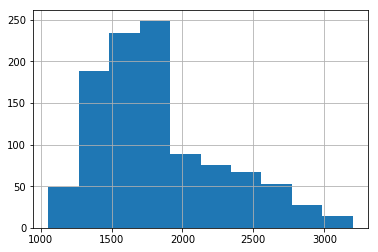

In [250]:
merge_housing['Apartment_rent'].hist()

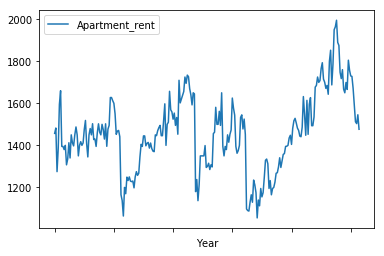

In [251]:
studio_df.plot.line(x='Year', y='Apartment_rent')

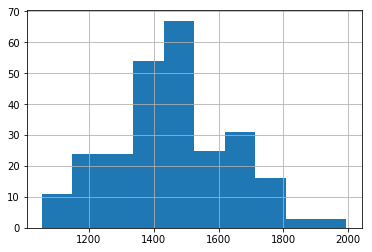

In [252]:
studio_df['Apartment_rent'].hist()

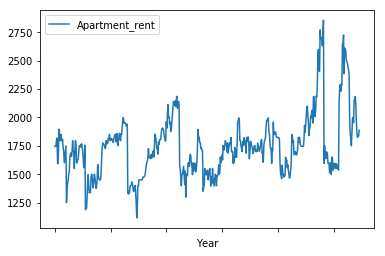

In [253]:
oneBed_df.plot.line(x='Year', y='Apartment_rent')

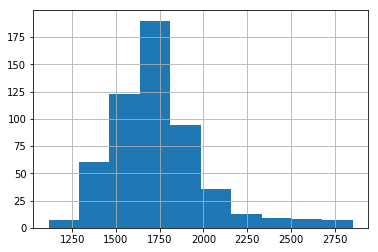

In [254]:
oneBed_df['Apartment_rent'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


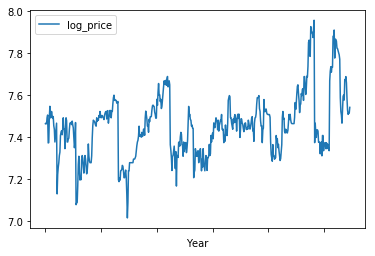

In [255]:
oneBed_df['log_price'] = np.log(oneBed_df['Apartment_rent'])
oneBed_df.plot.line(x='Year', y='log_price')

In [256]:
oneBed_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,log_price
258,1Bedroom,2016,06,1745.0,2016,06,568500.0,33,24,20,7.464510
259,1Bedroom,2016,07,1750.0,2016,07,576500.0,42,27,28,7.467371
260,1Bedroom,2016,08,1745.0,2016,08,587000.0,48,34,22,7.464510
261,1Bedroom,2016,09,1795.0,2016,09,600700.0,42,29,25,7.492760
262,1Bedroom,2016,10,1819.0,2016,10,616000.0,41,29,28,7.506042


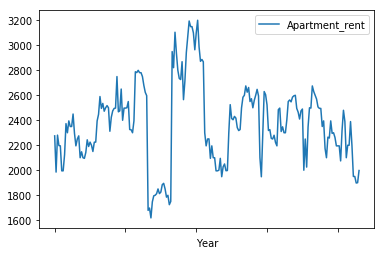

In [257]:
twoBed_df.plot.line(x='Year', y='Apartment_rent')

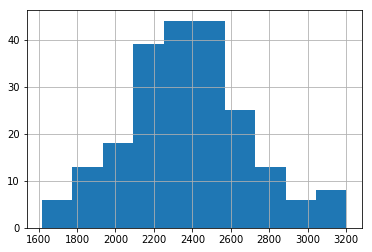

In [258]:
twoBed_df['Apartment_rent'].hist()

In [259]:
merge_housing_dropNa = merge_housing.dropna()
merge_housing_dropNa.Search_Count_SeattleRent = merge_housing_dropNa.Search_Count_SeattleRent.astype(int)
merge_housing_dropNa.Search_Count_SeattleHousing = merge_housing_dropNa.Search_Count_SeattleHousing.astype(int)
merge_housing_dropNa.Search_Count_seattleApartment = merge_housing_dropNa.Search_Count_seattleApartment.astype(int)

merge_housing_dropNa.dtypes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


BedSize                           object
Year                              object
Month                             object
Apartment_rent                   float64
Shift_Year                        object
Shift_Month                       object
Zillow_Housing_price             float64
Search_Count_SeattleRent           int64
Search_Count_SeattleHousing        int64
Search_Count_seattleApartment      int64
dtype: object

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


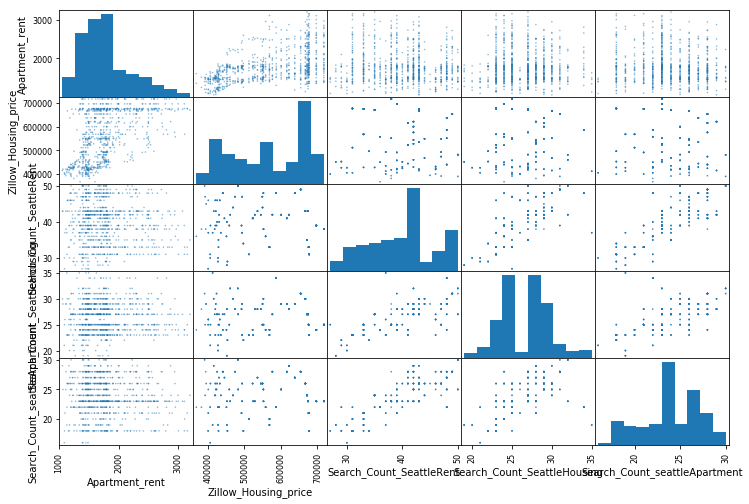

In [260]:
# Plot all of the variable-to-variable relations as scatterplots
pd.scatter_matrix(merge_housing_dropNa, figsize=(12,8), s=10);

In [261]:

studio_df.head()
studio_df['target_Apartment_rent'] = studio_df['Apartment_rent']
studio_df_test = studio_df.drop(['Apartment_rent', 'BedSize','Shift_Year', 'Shift_Month'], 1)

studio_df_test = studio_df_test.dropna()
studio_df_test.Year = studio_df_test.Year.astype(int)
studio_df_test.Month = studio_df_test.Month.astype(int)
studio_df_test.Search_Count_SeattleRent = studio_df_test.Search_Count_SeattleRent.astype(int)
studio_df_test.Search_Count_SeattleHousing = studio_df_test.Search_Count_SeattleHousing.astype(int)
studio_df_test.Search_Count_seattleApartment = studio_df_test.Search_Count_seattleApartment.astype(int)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [262]:
studio_df_test.corr()

,Year,Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,target_Apartment_rent
Year,1.000000,-0.262885,0.955854,-0.017561,0.076744,-0.057403,0.749770
Month,-0.262885,1.000000,-0.121638,0.076415,0.017895,0.128417,-0.038882
Zillow_Housing_price,0.955854,-0.121638,1.000000,-0.062440,0.055891,-0.070101,0.716076
Search_Count_SeattleRent,-0.017561,0.076415,-0.062440,1.000000,0.711905,0.807428,-0.089793
Search_Count_SeattleHousing,0.076744,0.017895,0.055891,0.711905,1.000000,0.602115,-0.011027
Search_Count_seattleApartment,-0.057403,0.128417,-0.070101,0.807428,0.602115,1.000000,-0.130576
target_Apartment_rent,0.749770,-0.038882,0.716076,-0.089793,-0.011027,-0.130576,1.000000


In [263]:
X_v=studio_df_test.iloc[:,:-1]
y_v=studio_df_test.iloc[:,-1:]

In [264]:
X_v.head()


,Year,Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment
0,2017,1,654100.0,49,31,28
1,2017,2,667000.0,43,30,26
2,2017,3,674400.0,43,27,23
3,2017,4,671400.0,35,27,24
4,2017,5,676000.0,33,25,21


In [265]:
y_v.head()

,target_Apartment_rent
0,1457.0
1,1482.5
2,1275.0
3,1385.0
4,1595.0


In [266]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation
reg = LinearRegression()
scores = cross_val_score(reg, X_v, y_v, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[13753.19243926  7419.32662035  1242.31810641  3643.90382514
 24628.486604   34067.4793378   8810.8195841   3642.58373765
  3789.03948497 80913.16859224]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

In [267]:
# Create your feature matrix (X) and target vector (y)
x_column = ' + '.join(X_v.columns)
y, X = patsy.dmatrices('target_Apartment_rent ~ ' + x_column, data=studio_df_test, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     target_Apartment_rent   R-squared:                       0.611
Model:                               OLS   Adj. R-squared:                  0.599
Method:                    Least Squares   F-statistic:                     51.63
Date:                   Mon, 23 Apr 2018   Prob (F-statistic):           7.17e-38
Time:                           21:11:27   Log-Likelihood:                -1254.1
No. Observations:                    204   AIC:                             2522.
Df Residuals:                        197   BIC:                             2545.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -2.737e+05   4.14e+04     -6.616      0.000   -3.55e+05   -1.92e+05
Year                            136.7496     20.608      6.636      0.000      96.110     177.389
Month                            13.3251      2.923      4.559      0.000       7.561      19.089
Zillow_Housing_price             -0.0007      0.000     -2.304      0.022      -0.001      -0.000
Search_Count_SeattleRent         -1.2300      2.756     -0.446      0.656      -6.666       4.206
Search_Count_SeattleHousing      -0.2361      3.843     -0.061      0.951      -7.815       7.342
Search_Count_seattleApartment    -5.0579      4.432     -1.141      0.255     -13.798       3.682
==============================================================================
Omnibus:                       14.237   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               38.809
Skew:                          -0.113   Prob(JB):                     3.74e-09
Kurtosis:                       5.125   Cond. No.                     2.92e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
# Create your feature matrix (X) and target vector (y)
x_column = ' + '.join(X_v.columns)
studio_df_test_transform = studio_df_test
studio_df_test_transform['target_Apartment_rent'] = np.log(studio_df_test['target_Apartment_rent'])
studio_df_test_transform.head()

,Year,Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,target_Apartment_rent
0,2017,1,654100.0,49,31,28,7.284135
1,2017,2,667000.0,43,30,26,7.301485
2,2017,3,674400.0,43,27,23,7.150701
3,2017,4,671400.0,35,27,24,7.233455
4,2017,5,676000.0,33,25,21,7.374629


In [269]:
x_column

'Year + Month + Zillow_Housing_price + Search_Count_SeattleRent + Search_Count_SeattleHousing + Search_Count_seattleApartment'

In [270]:

y, X = patsy.dmatrices('target_Apartment_rent ~ ' + x_column, data=studio_df_test_transform, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     target_Apartment_rent   R-squared:                       0.647
Model:                               OLS   Adj. R-squared:                  0.636
Method:                    Least Squares   F-statistic:                     60.08
Date:                   Mon, 23 Apr 2018   Prob (F-statistic):           6.68e-42
Time:                           21:11:27   Log-Likelihood:                 238.72
No. Observations:                    204   AIC:                            -463.4
Df Residuals:                        197   BIC:                            -440.2
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -216.6981     27.455     -7.893      0.000    -270.841    -162.555
Year                              0.1114      0.014      8.141      0.000       0.084       0.138
Month                             0.0107      0.002      5.506      0.000       0.007       0.015
Zillow_Housing_price          -7.327e-07   2.08e-07     -3.530      0.001   -1.14e-06   -3.23e-07
Search_Count_SeattleRent         -0.0009      0.002     -0.491      0.624      -0.005       0.003
Search_Count_SeattleHousing   -4.382e-05      0.003     -0.017      0.986      -0.005       0.005
Search_Count_seattleApartment    -0.0032      0.003     -1.077      0.283      -0.009       0.003
==============================================================================
Omnibus:                       19.561   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.073
Skew:                          -0.462   Prob(JB):                     3.28e-09
Kurtosis:                       4.935   Cond. No.                     2.92e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [271]:
studio_df_test.corr()

,Year,Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,target_Apartment_rent
Year,1.000000,-0.262885,0.955854,-0.017561,0.076744,-0.057403,0.764693
Month,-0.262885,1.000000,-0.121638,0.076415,0.017895,0.128417,-0.032124
Zillow_Housing_price,0.955854,-0.121638,1.000000,-0.062440,0.055891,-0.070101,0.718885
Search_Count_SeattleRent,-0.017561,0.076415,-0.062440,1.000000,0.711905,0.807428,-0.071741
Search_Count_SeattleHousing,0.076744,0.017895,0.055891,0.711905,1.000000,0.602115,0.001569
Search_Count_seattleApartment,-0.057403,0.128417,-0.070101,0.807428,0.602115,1.000000,-0.115558
target_Apartment_rent,0.764693,-0.032124,0.718885,-0.071741,0.001569,-0.115558,1.000000


In [298]:
studio_df_droplowCorr = studio_df_test.drop(['Search_Count_SeattleRent', 'Search_Count_SeattleHousing'], 1)
X_v=studio_df_droplowCorr.iloc[:,:-1]
y_v=studio_df_droplowCorr.iloc[:,-1:]
x_column = ' + '.join(X_v.columns)
studio_df_test_transform = studio_df_droplowCorr
#studio_df_test_transform['target_Apartment_rent'] = np.log(studio_df_droplowCorr['target_Apartment_rent'])
#studio_df_test_transform['Search_Count_seattleApartment']  = studio_df_test_transform['Search_Count_seattleApartment']* studio_df_test_transform['Year']
#studio_df_test_transform['Search_Count_SeattleRent'] = studio_df_droplowCorr['target_Apartment_rent'] * studio_df_droplowCorr['Search_Count_seattleApartment']
studio_df_test_transform.head()

,Year,Month,Zillow_Housing_price,Search_Count_seattleApartment,target_Apartment_rent
0,2017,1,654100.0,28,7.284135
1,2017,2,667000.0,26,7.301485
2,2017,3,674400.0,23,7.150701
3,2017,4,671400.0,24,7.233455
4,2017,5,676000.0,21,7.374629


In [305]:

y, X = patsy.dmatrices('target_Apartment_rent ~ ' + x_column, data=studio_df_test_transform, return_type="dataframe")


In [319]:

# Create your model
model = sm.OLS.fit_regularized(y.values, X, alpha=1.0, L1_wt = 0.5) # Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().